Automatically created module for IPython interactive environment


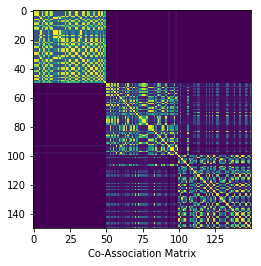

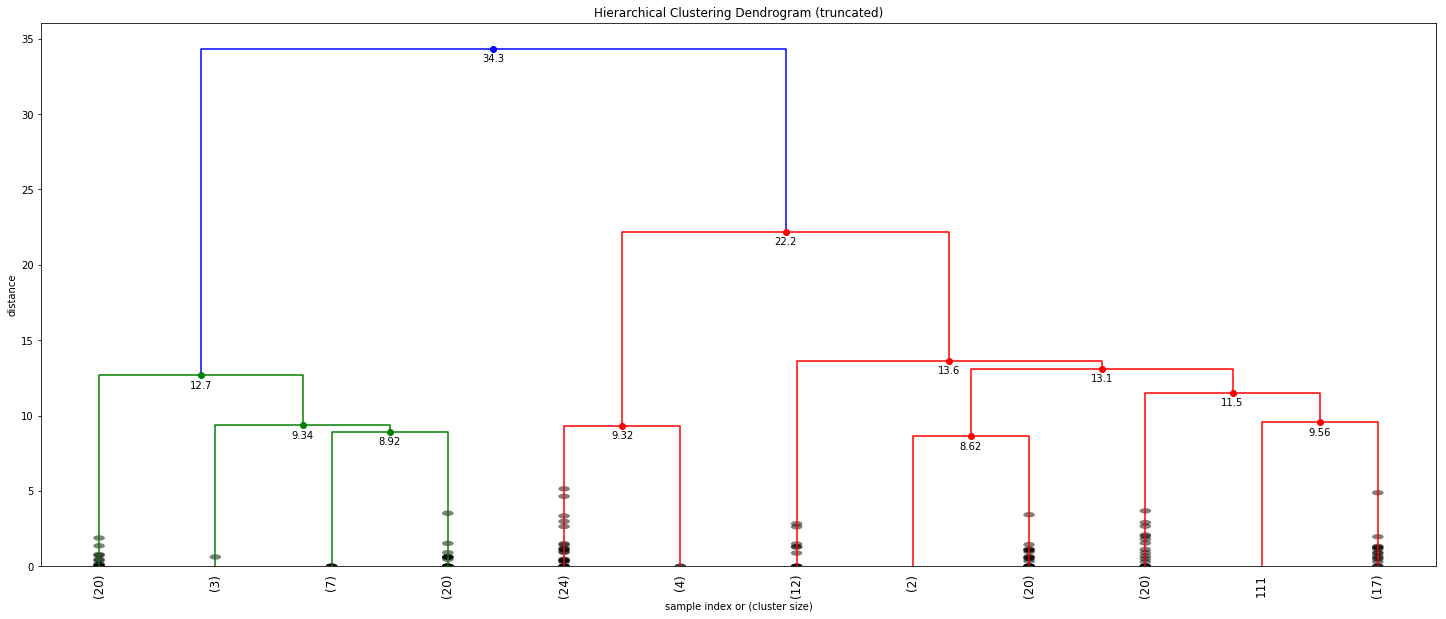

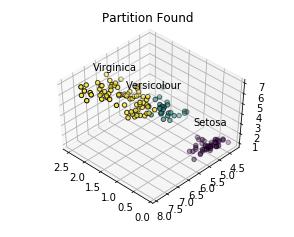

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [103]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import random
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import datasets

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


iris = datasets.load_iris()
X = iris.data
y = iris.target

co_association = np.zeros((len(X), len(X)))
max_part = 50
vote = 1 / max_part

#Defining the estimators
estimators = []
for x in range(1, max_part + 1): #Closed range
    k = random.randint(2, 20)
    key = 'k_means_iris_' + str(x) + '_' + str(k)
    estimators.append((key, KMeans(n_clusters=k)))

#Split
for name, est in estimators:
    est.fit(X)
    labels = est.labels_
    
    #Combine
    for i, aa in enumerate(X):
        for j, ab in enumerate(X):
            #Merge - Voting mechanism
            if(labels[i] == labels[j]):
                co_association[i, j] += vote


plt.xlabel('Co-Association Matrix')
plt.imshow(co_association)
plt.show()

# calculate full dendrogram
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
Z = linkage(co_association, 'single', metric="cityblock")
clusters = fcluster(Z, 3, criterion='maxclust')

plt.figure(figsize=(25, 10))
plt.title('Dendrogram - SL over Co-Association Matrix')
plt.ylabel('Distance')
fancy_dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12., # font size for the x axis abels,
    show_contracted=True  # to get a distribution impression in truncated branches
)
plt.show()

# Plot the ground truth
fig = plt.figure(1, figsize=(4, 3))

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
            X[y == label, 0].mean(),
            X[y == label, 2].mean() + 2, name,
            horizontalalignment='center',
            bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=clusters.astype(np.float), edgecolor='k')
ax.set_title('Partition Found')
ax.dist = 12

plt.show()
print(clusters) 

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [ ]:
# fignum = 1
# titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
# for name, est in estimators:
#     fig = plt.figure(fignum, figsize=(4, 3))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#     est.fit(X)
#     labels = est.labels_

#     ax.scatter(X[:, 3], X[:, 0], X[:, 2],
#            	c=labels.astype(np.float), edgecolor='k')

#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])
#     ax.set_xlabel('Petal width')
#     ax.set_ylabel('Sepal length')
#     ax.set_zlabel('Petal length')
#     ax.set_title(name)
#     ax.dist = 12
#     fignum = fignum + 1

# # Plot the ground truth
# fig = plt.figure(fignum, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# for name, label in [('Setosa', 0),
#                     ('Versicolour', 1),
#                     ('Virginica', 2)]:
#     ax.text3D(X[y == label, 3].mean(),
#             X[y == label, 0].mean(),
#             X[y == label, 2].mean() + 2, name,
#             horizontalalignment='center',
#             bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Petal width')
# ax.set_ylabel('Sepal length')
# ax.set_zlabel('Petal length')
# ax.set_title('Ground Truth')
# ax.dist = 12

# plt.show()


In [57]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata